In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns ; sns.set()

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
jobs = pd.read_csv('cleaned_list.csv')
print(jobs.shape)
print(jobs.nunique())
jobs.head()

(300, 25)
Job Title            140
Salary Estimate       10
Job Description      271
Rating                25
Company Name         230
Location             129
Headquarters         141
Size                   9
Founded               80
Type of ownership     12
Industry              44
Sector                21
Revenue               14
Competitors           52
hourly                 1
min_salary            10
max_salary            10
avg_salary             9
city                 127
state                 35
same_state             2
company_age           80
job_tag                5
job_level              2
num_competitors        4
dtype: int64


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,city,state,same_state,company_age,job_tag,job_level,num_competitors
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,70,116,93.0,Chantilly,VA,0,52,data scientist,NaN,0
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,70,116,93.0,Boston,MA,1,-1,data scientist,NaN,0
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,70,116,93.0,Cincinnati,OH,1,28,other,NaN,0
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,70,116,93.0,New Castle,DE,0,-1,other,NaN,2
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,70,116,93.0,Austin,TX,0,179,data scientist,NaN,2


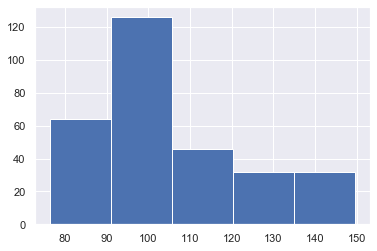

In [3]:
jobs.avg_salary.hist(bins=5)

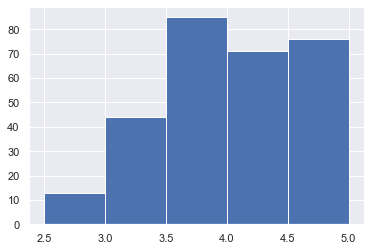

In [4]:
jobs[jobs['Rating'] != -1].Rating.hist(bins=5)

In [19]:
print(jobs['Size'].value_counts())
print(jobs['state'].value_counts())
print(jobs['job_tag'].value_counts())
print(jobs['job_level'].value_counts())

51 to 200 employees        68
10000+ employees           63
1 to 50 employees          44
1001 to 5000 employees     39
201 to 500 employees       32
5001 to 10000 employees    22
501 to 1000 employees      21
Unknown                     8
-1                          3
Name: Size, dtype: int64
 CA          70
 MA          27
 NY          24
 TX          21
 VA          20
 WA          13
 DC          13
 IL          10
 PA           9
 NJ           9
 OH           8
 MO           8
 NC           6
 MD           4
 MI           4
 FL           4
 CO           4
 WI           4
 GA           3
 AL           3
 CT           3
 AZ           3
 PR           2
 NE           2
 UT           2
 MN           2
 AR           1
 IA           1
 KS           1
 LA           1
 TN           1
 Arapahoe     1
 KY           1
 NM           1
 DE           1
Name: state, dtype: int64
data scientist    238
other              44
data engineer      10
data analyst        5
mle                 3
Name: job

In [20]:
jobs.state.unique()

array([' VA', ' MA', ' OH', ' DE', ' TX', ' CA', ' NE', ' MD', ' DC',
       ' WA', nan, ' NY', ' WI', ' PA', ' NC', ' FL', ' IL', ' KY', ' AL',
       ' NJ', ' MI', ' MO', ' MN', ' KS', ' AR', ' CO', ' TN', ' LA',
       ' AZ', ' IA', ' GA', ' UT', ' PR', ' NM', ' CT', ' Arapahoe'],
      dtype=object)

In [32]:
# mapping by region to run statistal tests 

region = {' VA' :'SouthEast', ' MA':'NorthEast', ' OH':'MidWest', ' DE':'NorthEast', ' TX':'SouthWest', ' CA':'West', ' NE':'NorthEast', ' MD':'NorthEast', ' DC':'NorthEast',
       ' WA':'West',' NY':'NorthEast', ' WI':'MidWest', ' PA':'NorthEast', ' NC':'SouthEast', ' FL':'SouthEast', ' IL':'MidWest', ' KY':'SouthEast', ' AL':'SouthEast',
       ' NJ':'NorthEast', ' MI':'MidWest', ' MO':'West', ' MN':'MidWest', ' KS':'MidWest', ' AR':'SouthWest', ' CO':'West', ' TN':'SouthEast', ' LA':'SouthEast',
       ' AZ':'SouthWest', ' IA':'MidWest', ' GA':'SouthEast', ' UT':'West', ' PR':'SouthWest', ' NM': 'SouthWest', ' CT':'NorthEast', 
    
}

jobs['region'] = jobs.state.map(region)
jobs.region

0      SouthEast
1      NorthEast
2        MidWest
3      NorthEast
4      SouthWest
         ...    
295         West
296         West
297    SouthWest
298    NorthEast
299    SouthEast
Name: region, Length: 300, dtype: object

In [33]:
jobs['region'].value_counts()

West         97
NorthEast    92
SouthEast    39
MidWest      30
SouthWest    28
Name: region, dtype: int64

In [35]:
# since value counts seem to be similar we can create histogrmas to make sure they're about normal and the run a/b tests on the regions

jobs.groupby('region').mean()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,same_state,company_age,num_competitors
region,,,,,,,,,
MidWest,3.803333,1840.966667,0.0,79.966667,117.500000,98.733333,0.333333,44.233333,0.600000
NorthEast,3.842391,1587.391304,0.0,81.380435,126.184783,103.782609,0.478261,37.000000,0.423913
SouthEast,3.579487,1476.102564,0.0,79.461538,123.282051,101.371795,0.282051,25.435897,0.358974
SouthWest,3.510714,1541.214286,0.0,80.500000,123.535714,102.017857,0.178571,45.500000,0.821429
West,3.973196,1709.402062,0.0,85.742268,131.298969,108.520619,0.422680,18.762887,0.938144


SouthEast
NorthEast
MidWest
SouthWest
West
nan


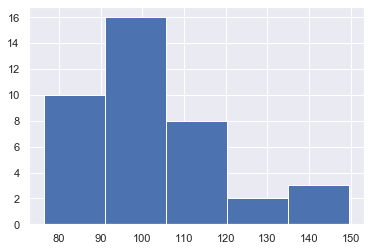

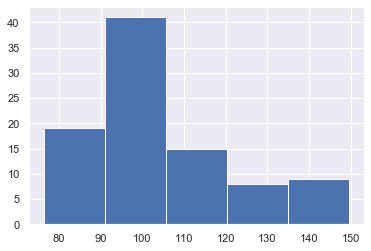

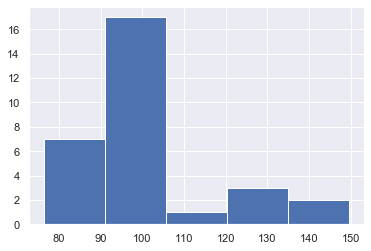

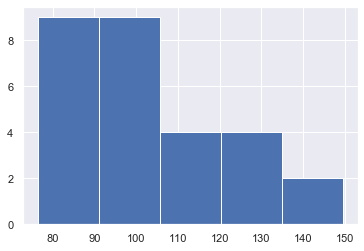

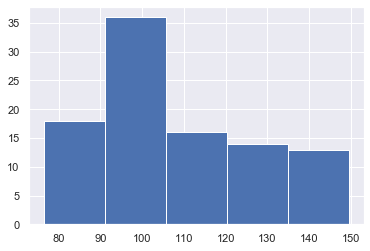

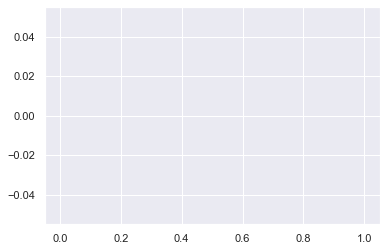

In [43]:
uniq_region = jobs.region.unique()

for reg in uniq_region:
    temp = jobs[jobs['region']==reg]
    plt.figure()
    temp.avg_salary.hist(bins=5)
    print(reg)


In [44]:
import scipy.stats as stats


In [47]:
stats.ttest_ind(jobs[jobs['region']== 'NorthEast'].avg_salary, 
               jobs[jobs['region']== 'West'].avg_salary, equal_var=True)

Ttest_indResult(statistic=-1.4089222153569796, pvalue=0.1605188044582634)

In [50]:
stats.ttest_ind(jobs[jobs['region']== 'NorthEast'].avg_salary, 
               jobs[jobs['region']== 'SouthEast'].avg_salary, equal_var=False)

Ttest_indResult(statistic=0.5819331220982586, pvalue=0.5623894463801942)